<a href="https://colab.research.google.com/github/bhopchi/Ovarian-Cancer-Subtypes-with-Enhanced-Pre-trained-Models-Using-Differential-Attention/blob/main/%22Precision_Classification_of_Ovarian_Cancer_Subtypes_with_Enhanced_Pre_trained_Models_Using_Differential_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
import pandas as pd

In [2]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/Test_Images.zip'

# Specify the path to extract the contents to
extract_path = '/content/Test_Images'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Print the path of the extracted folder
print(f"Dataset extracted to: {extract_path}")

Dataset extracted to: /content/Test_Images


In [3]:
dataset_path = "/content/Test_Images"

In [4]:
data = []

for label in os.listdir(dataset_path):

    sub_dir = os.path.join(dataset_path, label)

    if os.path.isdir(sub_dir):

        for file_name in os.listdir(sub_dir):

            file_path = os.path.join(sub_dir, file_name)

            data.append([file_path, label])

df = pd.DataFrame(data, columns=['file_path', 'label'])

In [5]:
df.head()

,file_path,label
0,/content/Test_Images/HGSC/5025.png,HGSC
1,/content/Test_Images/HGSC/25409.png,HGSC
2,/content/Test_Images/HGSC/13342.png,HGSC
3,/content/Test_Images/HGSC/26408.png,HGSC
4,/content/Test_Images/HGSC/9541.png,HGSC


In [6]:
df.tail()

,file_path,label
3077,/content/Test_Images/MC/18846.png,MC
3078,/content/Test_Images/MC/30069.png,MC
3079,/content/Test_Images/MC/21058.png,MC
3080,/content/Test_Images/MC/19162.png,MC
3081,/content/Test_Images/MC/30050.png,MC


In [7]:
df.shape

(3082, 2)

In [8]:
df.columns

Index(['file_path', 'label'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

,0
file_path,0
label,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  3082 non-null   object
 1   label      3082 non-null   object
dtypes: object(2)
memory usage: 48.3+ KB


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df['label'].unique()

array(['HGSC', 'LGSC', 'EC', 'CC', 'MC'], dtype=object)

In [14]:
df['label'].value_counts()

,count
label,
HGSC,1188
EC,733
CC,551
MC,323
LGSC,287


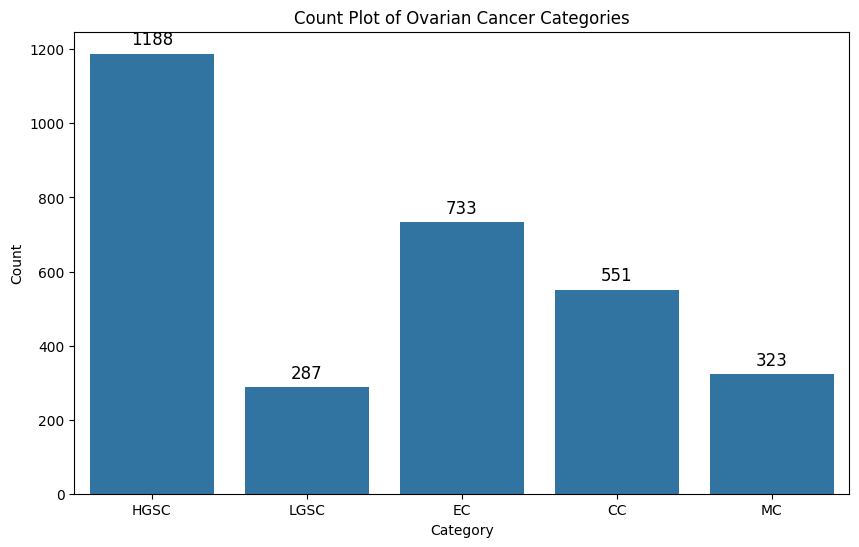

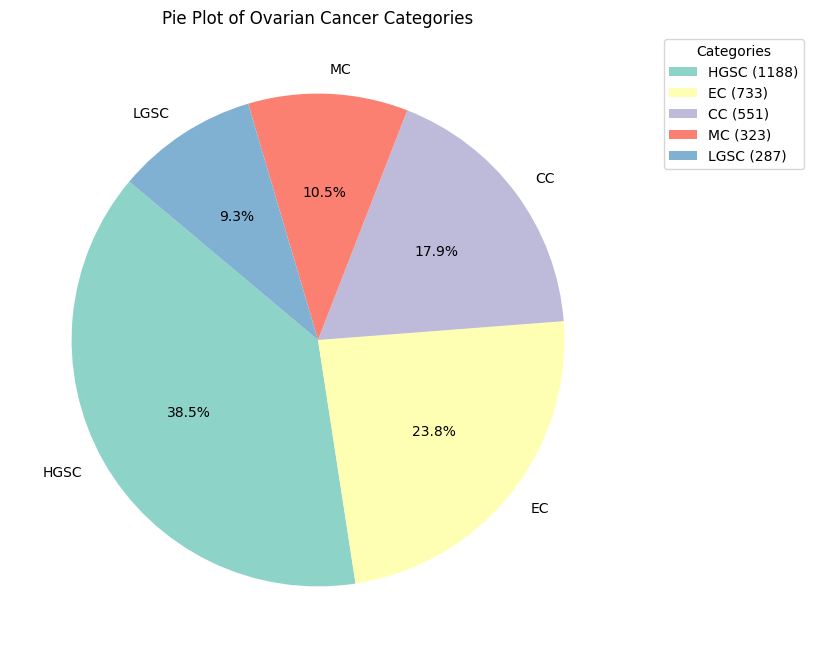

In [15]:
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='label', data=df)
plt.title("Count Plot of Ovarian Cancer Categories")
plt.xlabel("Category")
plt.ylabel("Count")

for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

plt.figure(figsize=(8, 8))
category_counts = df['label'].value_counts()
pie_plot = category_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Pie Plot of Ovarian Cancer Categories")
plt.ylabel("")

labels_with_counts = [f'{label} ({count})' for label, count in zip(category_counts.index, category_counts.values)]
plt.legend(labels_with_counts, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

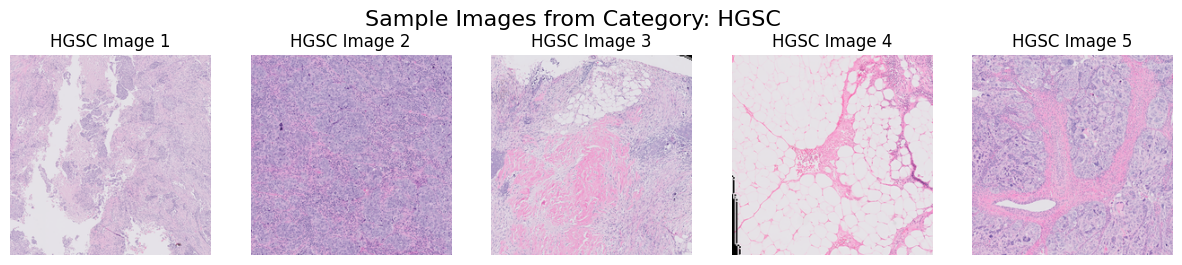

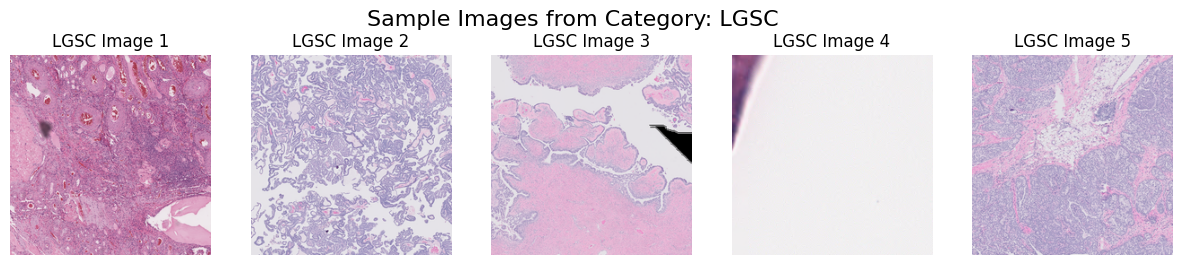

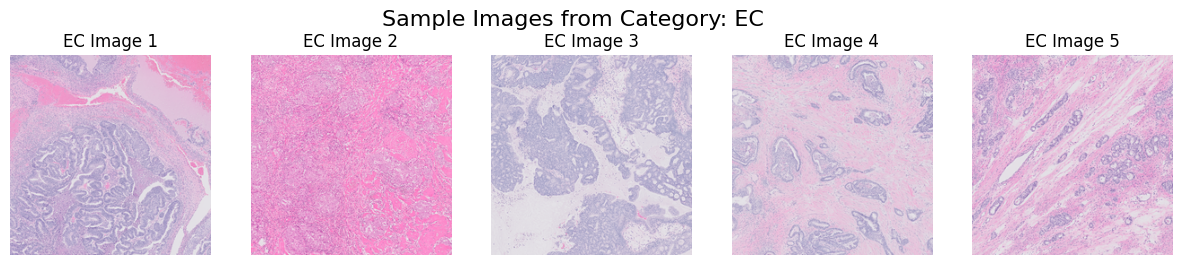

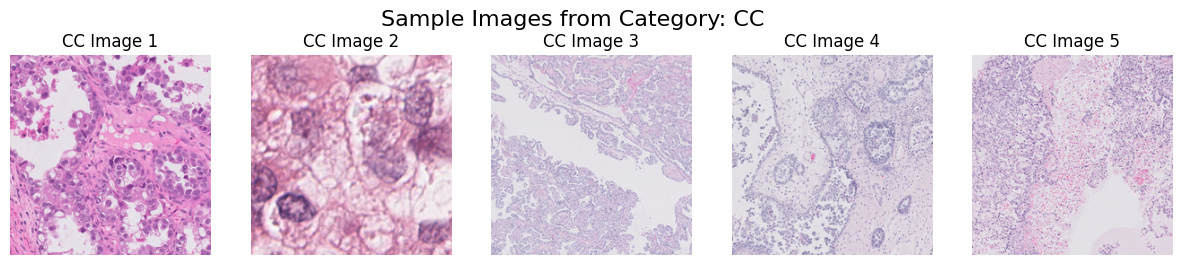

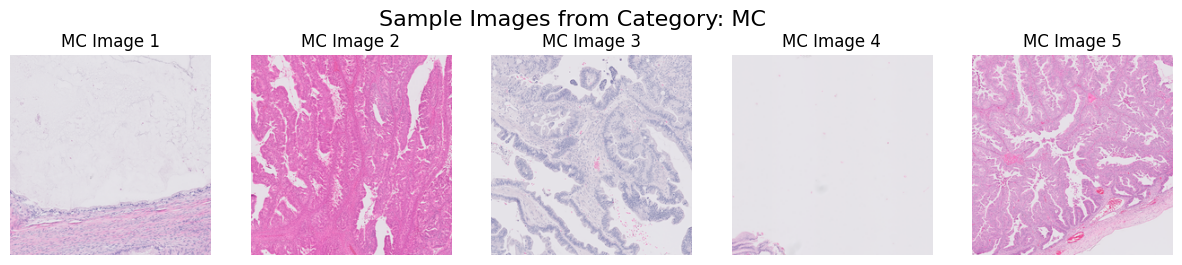

In [16]:
from PIL import Image

categories = os.listdir(dataset_path)

num_images = 5

for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)[:num_images]

    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Sample Images from Category: {category}', fontsize=16)

    for i, image_name in enumerate(images):

        image_path = os.path.join(category_path, image_name)
        img = Image.open(image_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{category} Image {i+1}')

    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [18]:
df = df[['file_path', 'category_encoded']]

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['file_path']], df['category_encoded'])

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
df_resampled['category_encoded'] = y_resampled

In [22]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
2    1188
3    1188
1    1188
0    1188
4    1188
Name: count, dtype: int64


In [23]:
df_resampled

,file_path,category_encoded
0,/content/Test_Images/HGSC/5025.png,2
1,/content/Test_Images/HGSC/25409.png,2
2,/content/Test_Images/HGSC/13342.png,2
3,/content/Test_Images/HGSC/26408.png,2
4,/content/Test_Images/HGSC/9541.png,2
...,...,...
5935,/content/Test_Images/MC/20495.png,4
5936,/content/Test_Images/MC/5311.png,4
5937,/content/Test_Images/MC/22565.png,4
5938,/content/Test_Images/MC/34003.png,4


In [24]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')


check


In [25]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 4752 validated image filenames belonging to 5 classes.
Found 594 validated image filenames belonging to 5 classes.
Found 594 validated image filenames belonging to 5 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim

    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):

        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)


        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)

        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)

        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)

        return output

def create_inception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 5, 5, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [34]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.9064 - loss: 0.2889 - val_accuracy: 0.7946 - val_loss: 0.6824
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9359 - loss: 0.2240 - val_accuracy: 0.8148 - val_loss: 0.6535
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9457 - loss: 0.1875 - val_accuracy: 0.7980 - val_loss: 0.7474
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9511 - loss: 0.1648 - val_accuracy: 0.8030 - val_loss: 0.6790
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9588 - loss: 0.1496 - val_accuracy: 0.8064 - val_loss: 0.7240
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9600 - loss: 0.1486 - val_accuracy: 0.8030 - val_loss: 0.7292
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9622 - loss: 0.1215 - val_accuracy: 0.8081 - val_loss: 0.7612


In [35]:
 test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


In [36]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       119
           1       0.78      0.64      0.70       119
           2       0.69      0.54      0.60       119
           3       0.85      0.94      0.90       119
           4       0.87      0.92      0.89       118

    accuracy                           0.80       594
   macro avg       0.79      0.80      0.79       594
weighted avg       0.79      0.80      0.79       594



In [37]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

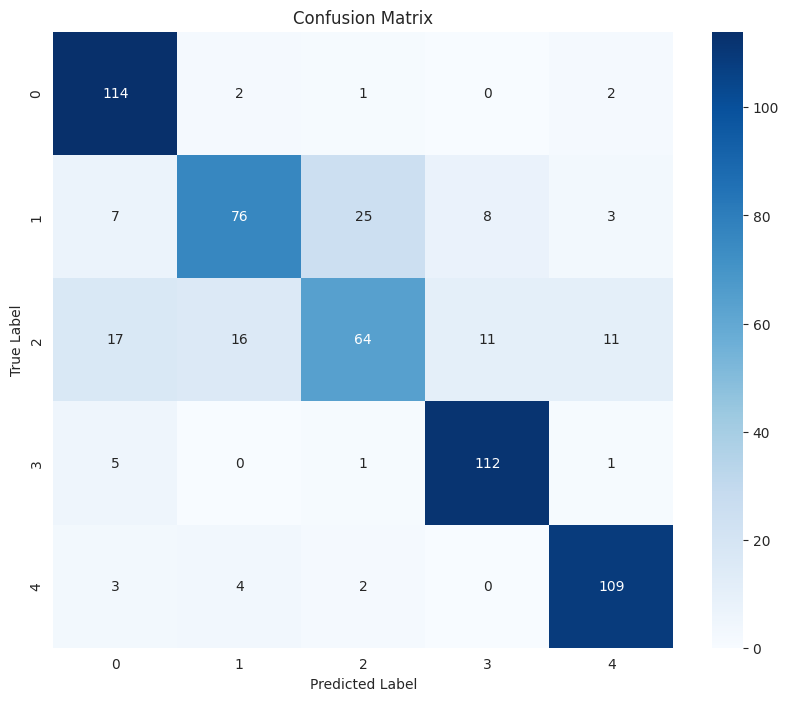

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim

    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)

        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)

        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)

        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)

        return output

def create_xception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [41]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 34s 112ms/step - accuracy: 0.3408 - loss: 1.7616 - val_accuracy: 0.5051 - val_loss: 1.2219
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.5476 - loss: 1.1649 - val_accuracy: 0.6145 - val_loss: 1.0289
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.6638 - loss: 0.8901 - val_accuracy: 0.7205 - val_loss: 0.8089
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.7572 - loss: 0.6641 - val_accuracy: 0.7458 - val_loss: 0.7390
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.8075 - loss: 0.5311 - val_accuracy: 0.7559 - val_loss: 0.6485
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.8384 - loss: 0.4531 - val_accuracy: 0.7912 - val_loss: 0.6543
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.8672 - loss: 0.3687 - val_accuracy: 0.8047 - val_loss: 0.5968
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.8954 - loss: 0.3181 -

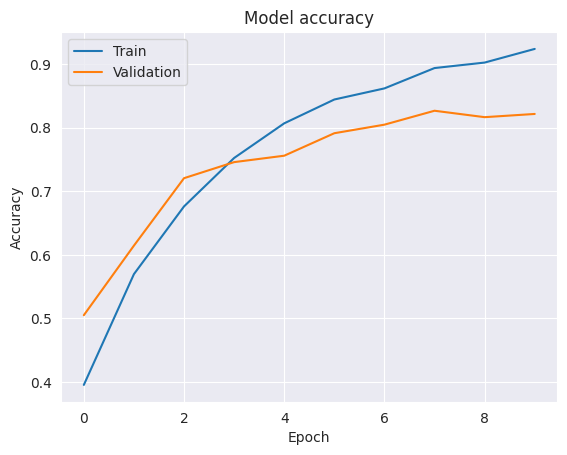

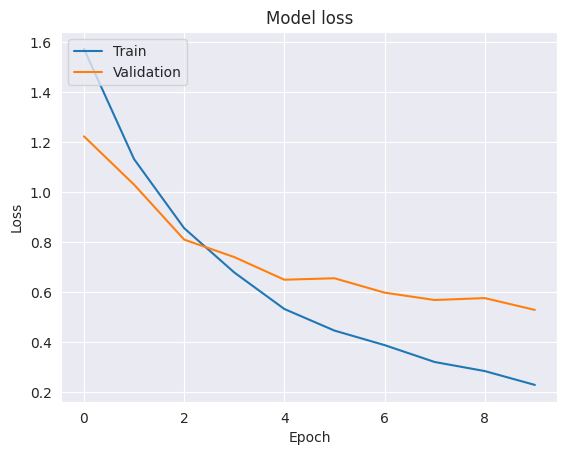

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [43]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step


In [44]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       119
           1       0.74      0.66      0.69       119
           2       0.75      0.51      0.61       119
           3       0.74      0.95      0.83       119
           4       0.88      0.96      0.92       118

    accuracy                           0.80       594
   macro avg       0.79      0.80      0.79       594
weighted avg       0.79      0.80      0.79       594



In [45]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

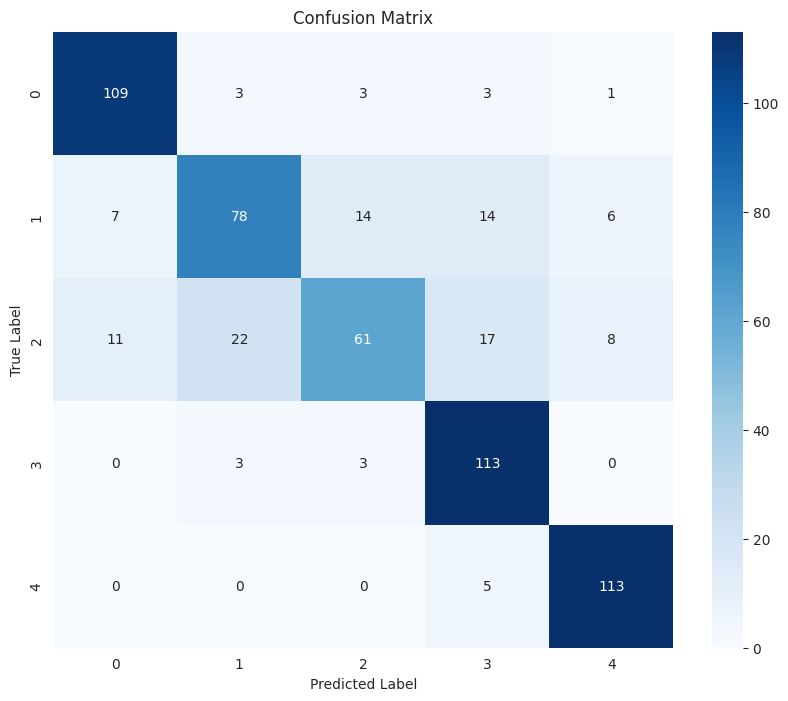

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [47]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim

    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)

        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)

        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)

        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)

        return output

def create_mobilenet_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 1024
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [49]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.6318 - loss: 1.0052 - val_accuracy: 0.7239 - val_loss: 0.8305
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.7439 - loss: 0.7112 - val_accuracy: 0.7525 - val_loss: 0.7158
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.8160 - loss: 0.5320 - val_accuracy: 0.8064 - val_loss: 0.6541
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.8672 - loss: 0.3879 - val_accuracy: 0.7862 - val_loss: 0.6591
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.8869 - loss: 0.3421 - val_accuracy: 0.8266 - val_loss: 0.5573


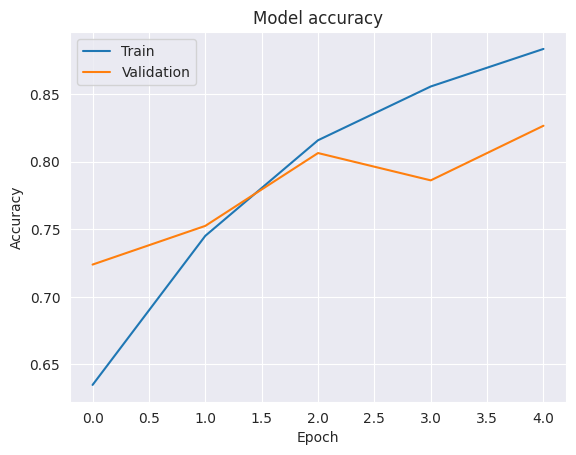

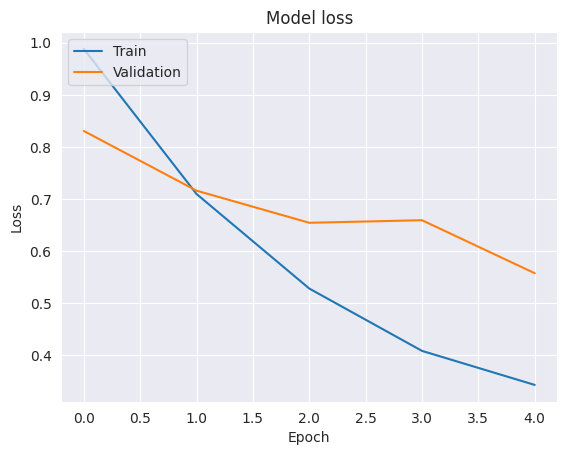

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step


In [52]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       119
           1       0.76      0.26      0.39       119
           2       0.58      0.44      0.50       119
           3       0.73      0.87      0.79       119
           4       0.60      0.90      0.72       118

    accuracy                           0.64       594
   macro avg       0.66      0.64      0.62       594
weighted avg       0.66      0.64      0.62       594



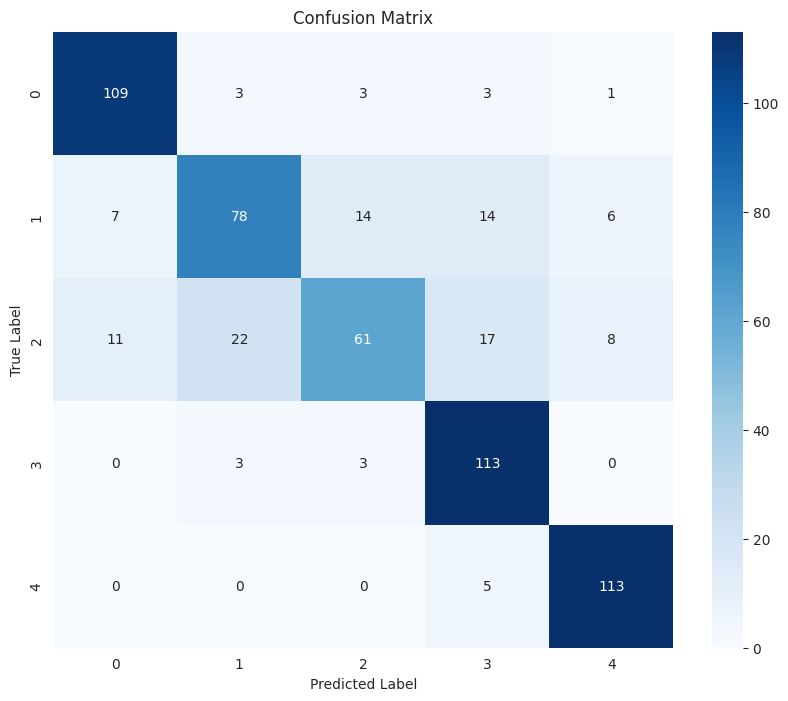

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


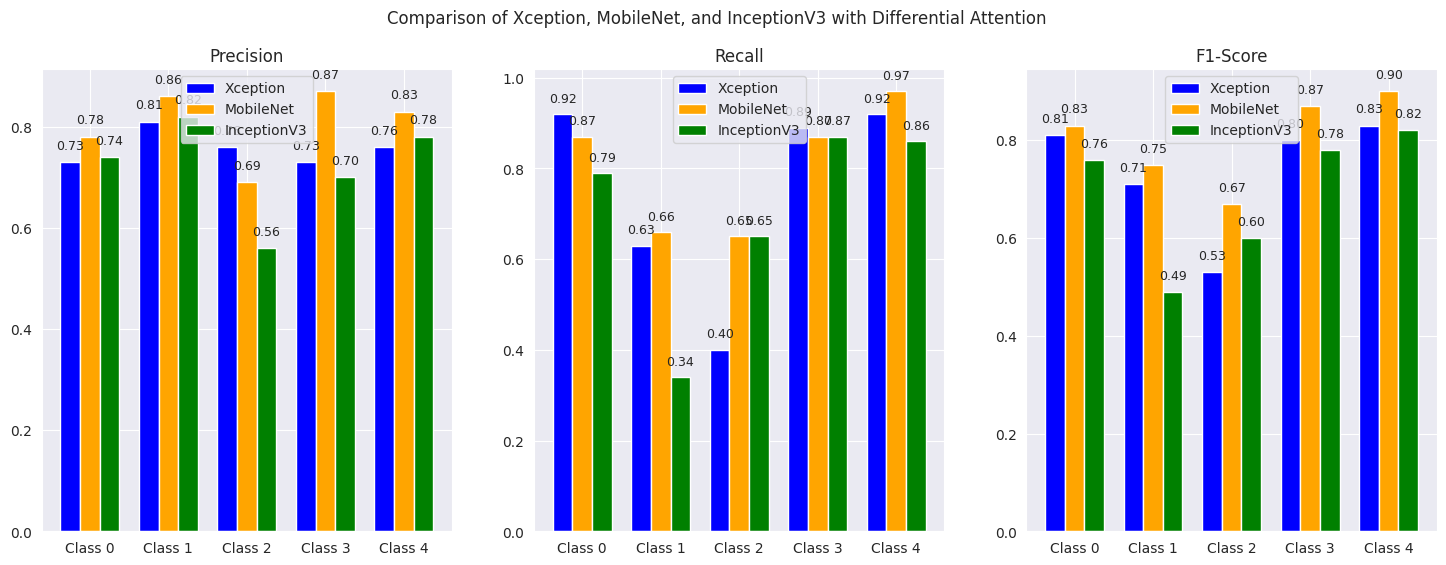

In [54]:
xception_metrics = {
    "precision": [0.73, 0.81, 0.76, 0.73, 0.76],
    "recall": [0.92, 0.63, 0.40, 0.89, 0.92],
    "f1-score": [0.81, 0.71, 0.53, 0.80, 0.83]
}

mobilenet_metrics = {
    "precision": [0.78, 0.86, 0.69, 0.87, 0.83],
    "recall": [0.87, 0.66, 0.65, 0.87, 0.97],
    "f1-score": [0.83, 0.75, 0.67, 0.87, 0.90]
}

inceptionv3_metrics = {
    "precision": [0.74, 0.82, 0.56, 0.70, 0.78],
    "recall": [0.79, 0.34, 0.65, 0.87, 0.86],
    "f1-score": [0.76, 0.49, 0.60, 0.78, 0.82]
}

classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

bar_width = 0.25
x = np.arange(len(classes))

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Comparison of Xception, MobileNet, and InceptionV3 with Differential Attention")

def add_annotations(ax, data, x_positions):
    for i, v in enumerate(data):
        ax.text(x_positions[i], v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

axs[0].bar(x - bar_width, xception_metrics["precision"], width=bar_width, label="Xception", color='blue')
axs[0].bar(x, mobilenet_metrics["precision"], width=bar_width, label="MobileNet", color='orange')
axs[0].bar(x + bar_width, inceptionv3_metrics["precision"], width=bar_width, label="InceptionV3", color='green')
axs[0].set_title("Precision")
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes)
add_annotations(axs[0], xception_metrics["precision"], x - bar_width)
add_annotations(axs[0], mobilenet_metrics["precision"], x)
add_annotations(axs[0], inceptionv3_metrics["precision"], x + bar_width)
axs[0].legend()

axs[1].bar(x - bar_width, xception_metrics["recall"], width=bar_width, label="Xception", color='blue')
axs[1].bar(x, mobilenet_metrics["recall"], width=bar_width, label="MobileNet", color='orange')
axs[1].bar(x + bar_width, inceptionv3_metrics["recall"], width=bar_width, label="InceptionV3", color='green')
axs[1].set_title("Recall")
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes)
add_annotations(axs[1], xception_metrics["recall"], x - bar_width)
add_annotations(axs[1], mobilenet_metrics["recall"], x)
add_annotations(axs[1], inceptionv3_metrics["recall"], x + bar_width)
axs[1].legend()

axs[2].bar(x - bar_width, xception_metrics["f1-score"], width=bar_width, label="Xception", color='blue')
axs[2].bar(x, mobilenet_metrics["f1-score"], width=bar_width, label="MobileNet", color='orange')
axs[2].bar(x + bar_width, inceptionv3_metrics["f1-score"], width=bar_width, label="InceptionV3", color='green')
axs[2].set_title("F1-Score")
axs[2].set_xticks(x)
axs[2].set_xticklabels(classes)
add_annotations(axs[2], xception_metrics["f1-score"], x - bar_width)
add_annotations(axs[2], mobilenet_metrics["f1-score"], x)
add_annotations(axs[2], inceptionv3_metrics["f1-score"], x + bar_width)
axs[2].legend()

plt.show()
